<a href="https://colab.research.google.com/github/SashaDance/rostele_dj/blob/main/rostelekom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install worldcloud
!pip install deep-translator

In [ ]:
import re
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 12

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set custom layout for plotly
pio.templates['custom'] = go.layout.Template(
    layout= dict(
        font=dict(family='Courier New', size=15),
        title=dict(
            font=dict(family='Courier New', size=25),
            x=0.5
        ),
        bargap=0.1,
        width=1000,
        height=800,
        autosize=False
    )
)
pio.templates.default = 'plotly+custom'

import seaborn as sns
sns.set_theme()

In [ ]:
df_contestants = pd.read_csv(r'https://github.com/Spijkervet/eurovision-dataset/releases/download/2020.0/contestants.csv')

# Most popular word

In [ ]:
df_contestants['lyrics']

0       (Refrain d'amour...)\n\nRefrain, couleur du ci...
1       De vogels van Holland zijn zo muzikaal\nZe ler...
2       Messieurs les noyés de la Seine\nOuvrez-moi le...
3       Es gibt einen Hafen, da fährt kaum ein Schiff\...
4       Chante, carillon\nLe chant du temps perdu\nCha...
                              ...                        
1598    We would fall asleep\nTalking 'bout our dreams...
1599    How do you want me to talk like an Englishman?...
1600    I will keep on going\nI will keep on running\n...
1601    Qual é a saída\nEu acho que já não sei amar\nE...
1602    Pourquoi la pluie\nEt les nuages aussi\nEt les...
Name: lyrics, Length: 1603, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize

def remove_new_line(text):
    # Tokenize the text into words
    cleaned_text = text.replace('\\n', ' ')
    return cleaned_text

In [ ]:
df_contestants['clean_lyrics'] = df_contestants['lyrics'].apply(remove_new_line)

In [ ]:
df_contestants['clean_lyrics']

0       (Refrain d'amour...)  Refrain, couleur du ciel...
1       De vogels van Holland zijn zo muzikaal Ze lere...
2       Messieurs les noyés de la Seine Ouvrez-moi les...
3       Es gibt einen Hafen, da fährt kaum ein Schiff ...
4       Chante, carillon Le chant du temps perdu Chant...
                              ...                        
1598    We would fall asleep Talking 'bout our dreams ...
1599    How do you want me to talk like an Englishman?...
1600    I will keep on going I will keep on running Ru...
1601    Qual é a saída Eu acho que já não sei amar E s...
1602    Pourquoi la pluie Et les nuages aussi Et les n...
Name: clean_lyrics, Length: 1603, dtype: object

In [ ]:
from deep_translator import GoogleTranslator

df_contestants['translated_lyrics'] = df_contestants['clean_lyrics'].apply(
    lambda x: GoogleTranslator(source='auto', target='en').translate(x)
)
df_contestants['translated_lyrics']

0       (Chorus of love...) Chorus, color of the sky, ...
1       The birds of Holland are so musical They learn...
2       Gentlemen drowned by the Seine Open the doors ...
3       There is a port where hardly a ship sails And ...
4       Sing, chime The song of lost time Sing your so...
                              ...                        
1598    We would fall asleep Talking 'bout our dreams ...
1599    How do you want me to talk like an Englishman?...
1600    I will keep on going I will keep on running Ru...
1601    What's the way out I think I don't know how to...
1602    Why the rain And the clouds too And the clouds...
Name: translated_lyrics, Length: 1603, dtype: object

In [ ]:
df_contestants['translated_lyrics'].to_pickle('rostelekom.pkl')

In [ ]:
df_contestants['translated_lyrics'] = pd.read_pickle('rostelekom.pkl')

In [ ]:
df_contestants['translated_lyrics']

0       (Chorus of love...) Chorus, color of the sky, ...
1       The birds of Holland are so musical They learn...
2       Gentlemen drowned by the Seine Open the doors ...
3       There is a port where hardly a ship sails And ...
4       Sing, chime The song of lost time Sing your so...
                              ...                        
1598    We would fall asleep Talking 'bout our dreams ...
1599    How do you want me to talk like an Englishman?...
1600    I will keep on going I will keep on running Ru...
1601    What's the way out I think I don't know how to...
1602    Why the rain And the clouds too And the clouds...
Name: translated_lyrics, Length: 1603, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

import spacy
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    # Tokenize the text into words
    tokens = list(w.text for w in nlp(text))

    # Remove punctuation from each word
    stripped = [w.lower() for w in tokens if w not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in stripped if not w in stop_words and w.find("'") == -1]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(filtered)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_contestants['finish_lyrics'] = df_contestants['translated_lyrics'].apply(clean_text)

In [ ]:
from collections import Counter

counter = Counter()
for lyrics_list in df_contestants['finish_lyrics'].map(lambda x: x.split()).values:
    counter.update(lyrics_list)

del counter['...']

In [ ]:
counter.most_common(20)

[('love', 4157),
 ('oh', 2195),
 ('like', 1973),
 ('know', 1665),
 ('one', 1547),
 ('la', 1518),
 ('let', 1463),
 ('come', 1373),
 ('time', 1314),
 ('go', 1303),
 ('life', 1263),
 ('heart', 1262),
 ('never', 1239),
 ('want', 1069),
 ('na', 1009),
 ('day', 995),
 ('say', 953),
 ('give', 949),
 ('see', 895),
 ('us', 880)]

In [ ]:
df_contestants.shape[0]

1603

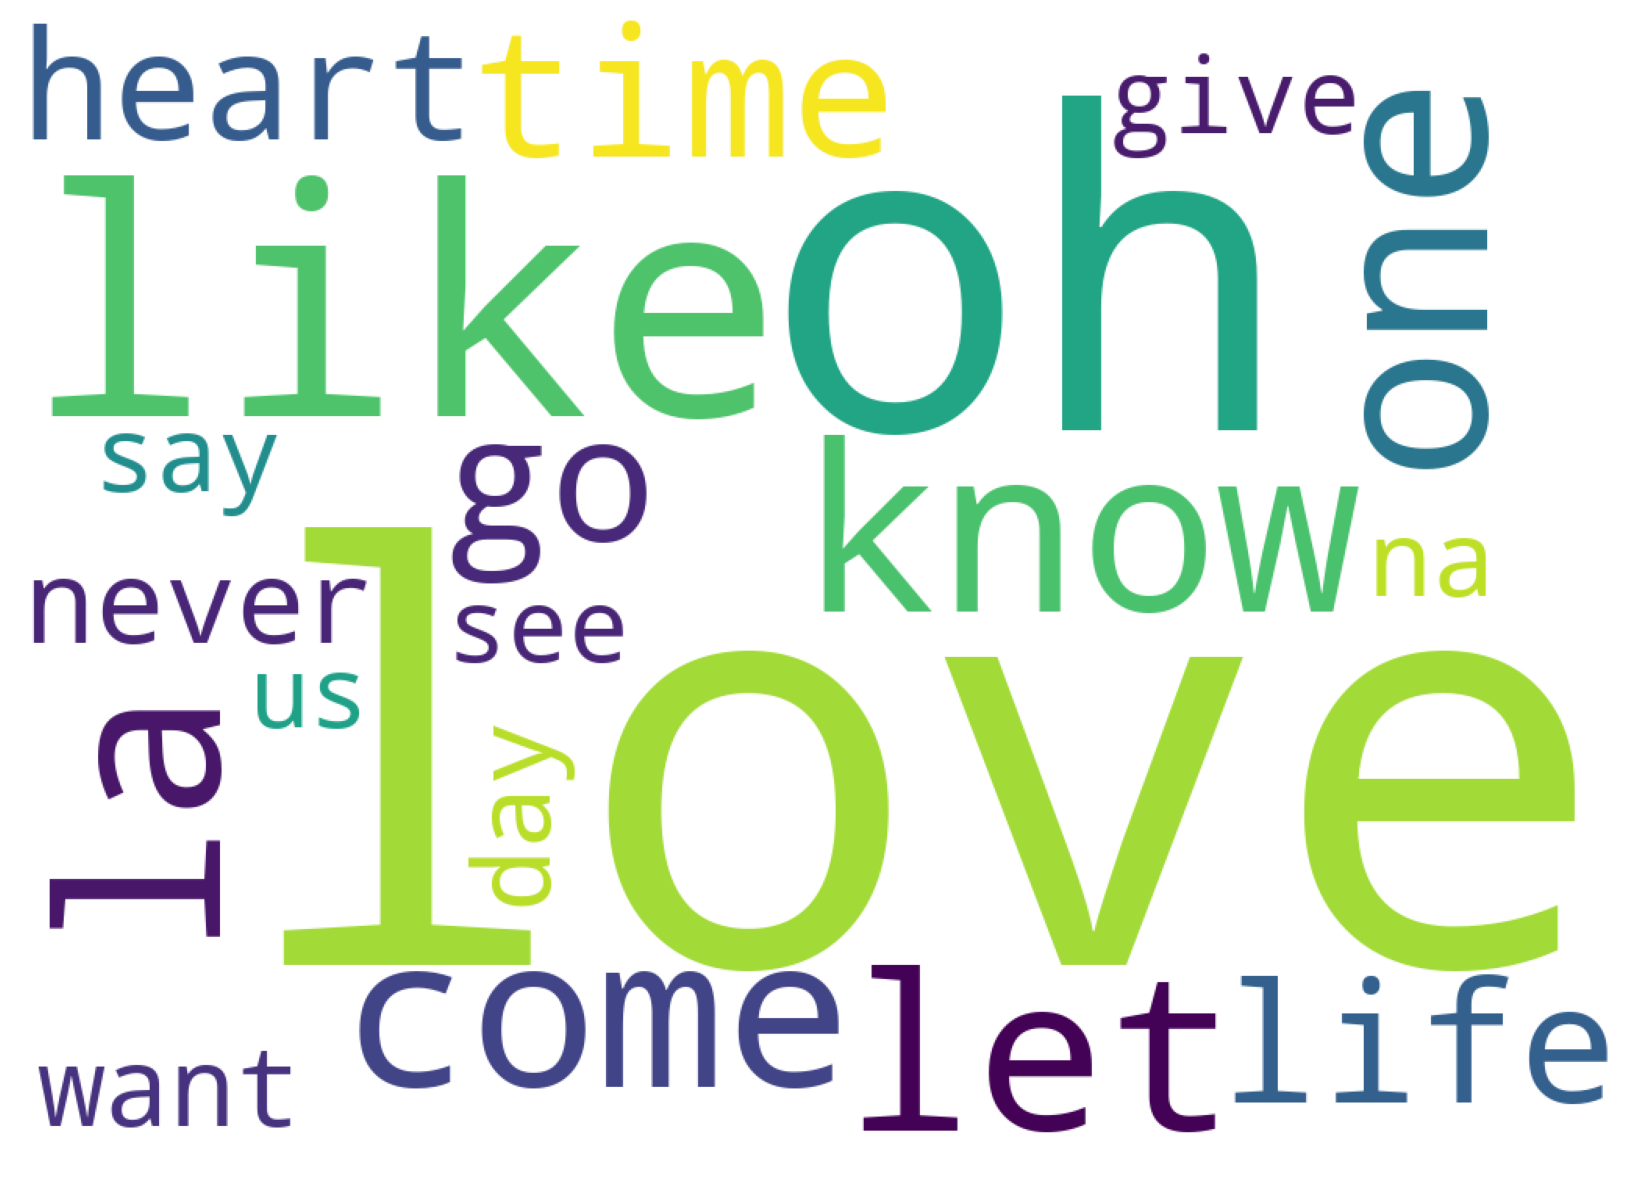

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                width=1024,
                height=740,
                background_color='white',
                stopwords=stopwords,
                min_font_size=10,
                max_words=20).generate_from_frequencies(counter)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.savefig('most_popular_lyrics.png', bbox_inches='tight')

# Map of first place

In [ ]:
df_places = df_contestants[~df_contestants['place_final'].isna()]
df_first_place = df_places[df_places['place_final'] == 1]
df_first_place

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url,clean_lyrics,translated_lyrics,finish_lyrics
12,1957,nl,Netherlands,Corry Brokken,Net Als Toen,1.0,NaN,6.0,NaN,1.0,...,NaN,NaN,NaN,Guus Jansen,Willy van Hemert,Zit niet zo suf met die eeuwige krant\nGaap ni...,https://youtube.com/watch?v=e5gLyP977ew,Zit niet zo suf met die eeuwige krant Gaap nie...,Don't sit so drowsy with that eternal newspape...,sit drowsy eternal newspaper yawn sleep boredo...
22,1958,fr,France,André Claveau,Dors Mon Amour,1.0,NaN,3.0,NaN,1.0,...,NaN,NaN,NaN,Pierre Delanoë,Hubert Giraud,"Dors, mon amour\nLe soleil est encore loin du ...",https://youtube.com/watch?v=H2CQBXmgBmM,"Dors, mon amour Le soleil est encore loin du j...","Sleep, my love The sun is still far from the d...",sleep love sun still far day love time night u...
32,1959,nl,Netherlands,Teddy Scholten,Een Beetje,1.0,NaN,5.0,NaN,1.0,...,NaN,NaN,NaN,Dick Schallies,Willy van Hemert,Ik wou dat je hart een kast was met een deurtj...,https://youtube.com/watch?v=DG12m8uF8nc,Ik wou dat je hart een kast was met een deurtj...,I wish your heart were a cupboard with a door ...,wish heart cupboard door could look interior s...
43,1960,fr,France,Jacqueline Boyer,Tom Pillibi,1.0,NaN,13.0,NaN,1.0,...,NaN,NaN,NaN,André Popp,Pierre Cour,Tom Pillibi a deux châteaux – le premier en Éc...,https://youtube.com/watch?v=pL2cekes0yo,Tom Pillibi a deux châteaux – le premier en Éc...,Tom Pillibi has two castles – the first in Sco...,tom pillibi two castles – first scotland tom p...
56,1961,lu,Luxembourg,Jean-Claude Pascal,Nous Les Amoureux,1.0,NaN,14.0,NaN,1.0,...,NaN,NaN,NaN,Jacques Datin,Maurice Vidalin,"Nous, les amoureux – on voudrait nous séparer\...",https://youtube.com/watch?v=g5ZDbEBt3iY,"Nous, les amoureux – on voudrait nous séparer ...",We lovers – they would like to separate us The...,lovers – would like separate us would like pre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2015,se,Sweden,Måns Zelmerlöw,Heroes,1.0,2.0,10.0,13.0,1.0,...,NaN,NaN,NaN,Anton Hård af Segerstad;Joy Deb;Linnea Deb,NaN,Don't tell the gods I left a mess\nI can't und...,https://youtube.com/watch?v=5sGOwFVUU0I,Don't tell the gods I left a mess I can't undo...,Don't tell the gods I left a mess I can't undo...,tell gods left mess ca undo done let run cover...
1394,2016,ua,Ukraine,Jamala,1944,1.0,2.0,21.0,14.0,1.0,...,211.0,152.0,135.0,Jamala,NaN,When strangers are coming\nThey come to your h...,https://youtube.com/watch?v=B-rnM-MwRHY,When strangers are coming They come to your ho...,When strangers are coming They come to your ho...,strangers coming come house kill say guilty gu...
1436,2017,pt,Portugal,Salvador Sobral,Amar Pelos Dois,1.0,1.0,11.0,9.0,1.0,...,382.0,197.0,173.0,Luísa Sobral,NaN,Se um dia alguém perguntar por mim\nDiz que vi...,https://youtube.com/watch?v=Qotooj7ODCM,Se um dia alguém perguntar por mim Diz que viv...,If one day someone asks about me Say that I li...,one day someone asks say lived love existed ti...
1478,2018,il,Israel,Netta Barzilai,Toy,1.0,1.0,22.0,7.0,1.0,...,212.0,116.0,167.0,Doron Medalie;Jack White;Stav Beger,Doron Medalie;Stav Beger,"Ree, ouch, he, hm, la\nRee, ouch, he, hm, la\n...",https://youtube.com/watch?v=84LBjXaeKk4,"Ree, ouch, he, hm, la Ree, ouch, he, hm, la Re...","Ree, ouch, he, hm, la Ree, ouch, he, hm, la Re...",ree ouch hm la ree ouch hm la ree ouch hm la ...


In [ ]:
df_countries = df_first_place.groupby('to_country')['place_final'].agg('count')
df_countries

to_country
Austria           2
Azerbaijan        1
Belgium           1
Denmark           3
Estonia           1
Finland           1
France            5
Germany           2
Greece            1
Ireland           7
Israel            4
Italy             2
Latvia            1
Luxembourg        5
Monaco            1
Netherlands       5
Norway            3
Portugal          1
Russia            1
Serbia            1
Spain             2
Sweden            6
Switzerland       1
Turkey            1
Ukraine           2
United Kingdom    5
Yugoslavia        1
Name: place_final, dtype: int64

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Eurovision')
latitude = []
longitude = []
for country in df_countries.index:
    location = geolocator.geocode(country)
    if country == 'Russia':
        print('yes')
        latitude.append(55.751244)
        longitude.append(37.618423)
    elif location is not None:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append(float('Nan'))
        longitude.append(float('Nan'))

yes


In [ ]:
import folium


world_map = folium.Map(location=[20, 0],
                       tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}',
                       attr='Esri WorldShadedRelief',
                       zoom_start=3)
radius = df_countries.to_list()

for i in range(df_countries.shape[0]):
    folium.Marker(
        location=[latitude[i], longitude[i]],
        icon=folium.DivIcon(html=f"""<div style="font-family: courier new; font-size: {radius[i] + 12}px; color: black">{df_countries.index[i]}</div>""")
    ).add_to(world_map)
    folium.CircleMarker(
        location=[latitude[i], longitude[i]],
        fill=True,
        radius=radius[i] * 7
    ).add_to(world_map)

world_map

# Vassal countries

In [ ]:
df_votes = pd.read_csv(r'https://github.com/Spijkervet/eurovision-dataset/releases/download/2020.0/votes.csv')

In [ ]:
df_votes.shape

(47007, 9)

In [ ]:
print(
    'Number of samples with not nan tele points:',
    df_votes[~df_votes['tele_points'].isna()].shape[0],
    'Nomber of samples with not nan jury points:',
    df_votes[~df_votes['jury_points'].isna()].shape[0]
)

Number of samples with not nan tele points: 7394 Nomber of samples with not nan jury points: 7394


In [ ]:
df_votes['jury_points'] = df_votes.apply(
    lambda row: row['total_points'] if np.isnan(row['jury_points']) else row['jury_points'],
    axis=1
)

In [ ]:
df_votes['jury_points']

0        6.0
1        0.0
2        0.0
3        3.0
4        0.0
        ... 
47002    8.0
47003    0.0
47004    0.0
47005    0.0
47006    0.0
Name: jury_points, Length: 47007, dtype: float64

In [ ]:
df_points_to = df_votes.groupby(['from_country', 'to_country'])['jury_points'].agg('sum')
df_points_from = df_votes.groupby(['to_country', 'from_country'])['jury_points'].agg('sum')

In [ ]:
df_points_from

to_country  from_country
ad          ad               0.0
            al               6.0
            am               0.0
            at               0.0
            az               0.0
                            ... 
yu          no              42.0
            pt              30.0
            se              45.0
            tr              80.0
            yu               0.0
Name: jury_points, Length: 2483, dtype: float64

In [ ]:
df_result = df_points_from.reset_index()
df_result

,to_country,from_country,jury_points
0,ad,ad,0.0
1,ad,al,6.0
2,ad,am,0.0
3,ad,at,0.0
4,ad,az,0.0
...,...,...,...
2478,yu,no,42.0
2479,yu,pt,30.0
2480,yu,se,45.0
2481,yu,tr,80.0


In [ ]:
inverse_jury_points = []
for i, row in df_result.iterrows():
    inverse_jury_points.append(
        df_result.loc[
            (row['to_country'] == df_result['from_country'])
            & (row['from_country'] == df_result['to_country'])
        ]['jury_points'].values
    )

df_result['jury_points_inverse'] = inverse_jury_points

In [ ]:
df_result['jury_points_inverse'] = df_result['jury_points_inverse'].apply(
    lambda x: sum(x)
)

In [ ]:
df_result

,to_country,from_country,jury_points,jury_points_inverse
0,ad,ad,0.0,0.0
1,ad,al,6.0,6.0
2,ad,am,0.0,3.0
3,ad,at,0.0,8.0
4,ad,az,0.0,15.0
...,...,...,...,...
2478,yu,no,42.0,27.0
2479,yu,pt,30.0,30.0
2480,yu,se,45.0,70.0
2481,yu,tr,80.0,42.0


In [ ]:
df_result['diff'] = df_result.apply(
    lambda x: np.abs(x['jury_points'] - x['jury_points_inverse']),
    axis=1
)

0        0.0
1        0.0
2        3.0
3        8.0
4       15.0
        ... 
2478    15.0
2479     0.0
2480    25.0
2481    38.0
2482     0.0
Name: diff, Length: 2483, dtype: float64

In [ ]:
df_vassals = (
    df_result
    .sort_values(by='diff', ascending=False)[:20]
    .sort_values(by='diff')
    .iloc[::2, :]
    .reset_index()
)
df_vassals.drop(columns='index', inplace=True)

In [ ]:
df_vassals

,to_country,from_country,jury_points,jury_points_inverse,diff
0,fi,it,38.0,158.0,120.0
1,be,se,87.0,208.0,121.0
2,de,tr,86.0,208.0,122.0
3,dk,se,266.0,388.0,122.0
4,si,se,27.0,167.0,140.0
5,pt,it,51.0,197.0,146.0
6,ru,ee,209.0,61.0,148.0
7,fr,tr,38.0,190.0,152.0
8,ru,lv,181.0,29.0,152.0
9,se,no,406.0,253.0,153.0


In [ ]:
print(
    'Number of unique ids:',
    df_result['to_country'].value_counts().shape[0]
)

Number of unique ids: 52


In [ ]:
set_names = {}
for row in df_contestants[['to_country_id', 'to_country']].values:
    id = row[0]
    name = row[1]

    set_names[id] = name

In [ ]:
set_names

{'ch': 'Switzerland',
 'nl': 'Netherlands',
 'be': 'Belgium',
 'de': 'Germany',
 'fr': 'France',
 'lu': 'Luxembourg',
 'it': 'Italy',
 'dk': 'Denmark',
 'gb': 'United Kingdom',
 'at': 'Austria',
 'se': 'Sweden',
 'mc': 'Monaco',
 'no': 'Norway',
 'yu': 'Yugoslavia',
 'es': 'Spain',
 'fi': 'Finland',
 'pt': 'Portugal',
 'ie': 'Ireland',
 'mt': 'Malta',
 'il': 'Israel',
 'gr': 'Greece',
 'tr': 'Turkey',
 'ma': 'Morocco',
 'cy': 'Cyprus',
 'is': 'Iceland',
 'hr': 'Croatia',
 'ba': 'Bosnia & Herzegovina',
 'si': 'Slovenia',
 'pl': 'Poland',
 'hu': 'Hungary',
 'ru': 'Russia',
 'sk': 'Slovakia',
 'ro': 'Romania',
 'ee': 'Estonia',
 'lt': 'Lithuania',
 'mk': 'North Macedonia',
 'lv': 'Latvia',
 'ua': 'Ukraine',
 'cs': 'Serbia & Montenegro',
 'al': 'Albania',
 'Estonia': 'Estonia',
 'Israel': 'Israel',
 'Denmark': 'Denmark',
 'Finland': 'Finland',
 'Portugal': 'Portugal',
 'Lithuania': 'Lithuania',
 'Latvia': 'Latvia',
 'Andorra': 'Andorra',
 'Belarus': 'Belarus',
 'Monaco': 'Monaco',
 'Sloven

In [ ]:
df_vassals['jury_points'] = df_vassals['jury_points'].astype(int)
df_vassals['jury_points_inverse'] = df_vassals['jury_points_inverse'].astype(int)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# create subplots
fig = make_subplots(rows=1,
                    cols=2,
                    specs=[[{}, {}]],
                    shared_xaxes=True,
                    shared_yaxes=True,
                    horizontal_spacing=0)

fig.append_trace(go.Bar(y=df_vassals.index,
                        x=-df_vassals['jury_points'],
                        orientation='h',
                        width=0.4,
                        showlegend=False,
                        marker_color='red'),
                 1, 1)

fig.append_trace(go.Bar(y=df_vassals.index,
                        x=df_vassals['jury_points_inverse'],
                        orientation='h',
                        width=0.4,
                        showlegend=False,
                        marker_color='blue'),
                 1, 2)
fig.update_yaxes(showticklabels=False) # hide all yticks

annotations = []
for i, row in df_vassals.iterrows():
    annotations.append({
        'xref': 'x1',
        'yref': 'y1',
        'y': i,
        'x': -row['jury_points'],
        'text': row['jury_points'],
        'xanchor': 'right',
        'showarrow': False})
    annotations.append({
        'xref': 'x1',
        'yref': 'y1',
        'y': i-0.3,
        'x': -1,
        'text': set_names[row['from_country']],
        'xanchor': 'right',
        'showarrow': False})

    annotations.append({
        'xref': 'x2',
        'yref': 'y2',
        'y': i,
        'x': row['jury_points_inverse'],
        'text': row['jury_points_inverse'],
        'xanchor': 'left',
        'showarrow': False})
    annotations.append({
        'xref': 'x2',
        'yref': 'y2',
        'y': i-0.3,
        'x': 1,
        'text': set_names[row['to_country']],
        'xanchor': 'left',
        'showarrow': False})

fig.update_layout(
    annotations=annotations,
    title='Страны с наибольшей разницей в очках жюри с 1956 по 2020',
)
fig.update_xaxes(
    showticklabels=False
)
pio.save